In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


C:\Users\Manan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Load data
df = pd.read_csv("C:/Users//Manan//OneDrive//Desktop//Career//tatamotors.csv",index_col= 'Date', parse_dates = True)

# Extracting 'Open' prices
prices = df.iloc[:,0].values

# Feature Scaling
# Assuming 'prices' is a 1D array
prices = prices.reshape(-1, 1)

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)



C:\Users\Manan\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30-04-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Manan\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29-04-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Manan\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '26-04-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Manan\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '25-04-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Manan\anaconda3\lib

In [10]:
df.head()

,Open,High,Low,Close,Volume,- SPREAD -,Unnamed: 7
Date,,,,,,,
2024-04-30,1005.00,1019.55,999.00,1007.85,282403,20.55,-2.85
2024-04-29,1004.15,1005.50,999.15,1000.45,147581,6.35,3.70
2024-04-26,1005.25,1007.55,996.70,999.35,282091,10.85,5.90
2024-04-25,994.00,1003.20,991.00,1000.80,290886,12.20,-6.80
2024-04-24,993.70,996.20,988.00,991.60,183427,8.20,2.10


In [11]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_dataset(prices_scaled, time_steps)


In [12]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [13]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\Manan\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 0.0301
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0032
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0024
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0024
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0018
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0021
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0019
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0021
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0017
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0018
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0018
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0018
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0016
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0017
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - 

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


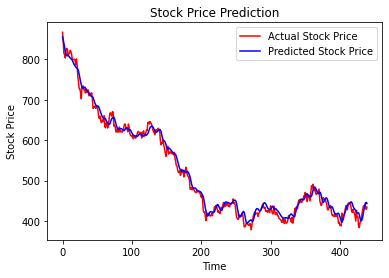

Mean Squared Error (MSE): 162.485508711312


In [18]:

from sklearn.metrics import mean_squared_error
# Fit the MinMaxScaler with training data
scaler.fit(prices.reshape(-1, 1))

# Predictions on training set
predicted_prices_scaled = model.predict(X)

# Inverse scaling
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

# Visualize results
plt.plot(prices[-len(predicted_prices):], color='red', label='Actual Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# Calculate Mean Squared Error
mse = mean_squared_error(prices[-len(predicted_prices):], predicted_prices)
print("Mean Squared Error (MSE):", mse)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 4.0426e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 4.7160e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 3.6808e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 5.3439e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 4.4854e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 5.0843e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 3.6770e-04
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 4.7216e-04
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 4.3772e-04
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 4.4580e-04
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 4.2496e-04
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 5.8069e-04
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 4.7237e-04
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 4.8436e-04
E

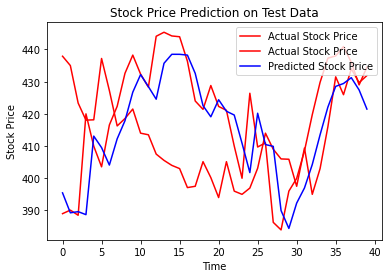

In [23]:
# Define the size of the training set
train_size = int(len(prices) * 0.8)

# Split the data into training and testing sets
train, test = prices[0:train_size], prices[train_size:len(prices)]

# Scale the training and testing data
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Create datasets for training and testing
X_train, y_train = create_dataset(train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, time_steps)

# Reshape the data to fit the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Fit the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
predicted_prices_scaled = model.predict(X_test)

# Inverse scaling
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

# Calculate Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, predicted_prices)
print("Test Mean Squared Error (MSE):", mse_test)




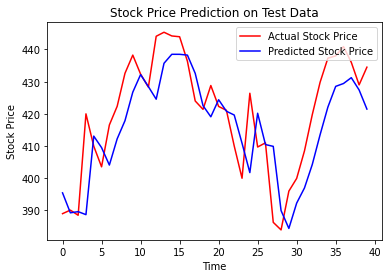

In [32]:
plt.plot(prices[-len(predicted_prices):],color = 'red', label='Actual Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction on Test Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()